<a href="https://colab.research.google.com/github/NicoSerrano24/DoorDash/blob/main/data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Testing: students with lower gpa have higher mental stress levels
#Variables: GPA (independnt), Mental Stress Level (dependent)

#Calc average stress levels for those with different GPA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
#Load the data set with only the required columns
df = pd.read_csv('data.csv')
df = df[['Student_ID',  'GPA' , 'Study_Hours_Per_Day']]
print(df)

      Student_ID   GPA  Study_Hours_Per_Day
0              1  2.99                  6.9
1              2  2.75                  5.3
2              3  2.67                  5.1
3              4  2.88                  6.5
4              5  3.51                  8.1
...          ...   ...                  ...
1995        1996  3.32                  6.5
1996        1997  2.65                  6.3
1997        1998  3.14                  6.2
1998        1999  3.04                  8.1
1999        2000  3.58                  9.0

[2000 rows x 3 columns]


In [66]:
#Grouping GPA into levels
def categorize_gpa(GPA):
  #0-2 low
  #2-3 med
  #3-4 high
  if GPA < 3:
    return 'Low'
  elif GPA >=3 and GPA <=3.5 :
    return 'Med'
  elif GPA > 3.5 :
    return 'High'

#Create new col for GPA groups
df['GPA lvl'] = df['GPA'].apply(categorize_gpa)
print(df)
print(type(df)) #Data frame
print(type(df['GPA lvl'])) #Each col is a Series



      Student_ID   GPA  Study_Hours_Per_Day GPA lvl
0              1  2.99                  6.9     Low
1              2  2.75                  5.3     Low
2              3  2.67                  5.1     Low
3              4  2.88                  6.5     Low
4              5  3.51                  8.1    High
...          ...   ...                  ...     ...
1995        1996  3.32                  6.5     Med
1996        1997  2.65                  6.3     Low
1997        1998  3.14                  6.2     Med
1998        1999  3.04                  8.1     Med
1999        2000  3.58                  9.0    High

[2000 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [67]:
#Calculate mean stress for GPA groups
#groupby() groups by col
#[]"Mental Stress Level"].mean() calculates mean stress level for each group
#resetindex() converts back into data
stress_by_gpa = df.groupby('GPA lvl')['Study_Hours_Per_Day'].mean().reset_index()
print(stress_by_gpa)


  GPA lvl  Study_Hours_Per_Day
0    High             9.180392
1     Low             6.287640
2     Med             7.935424


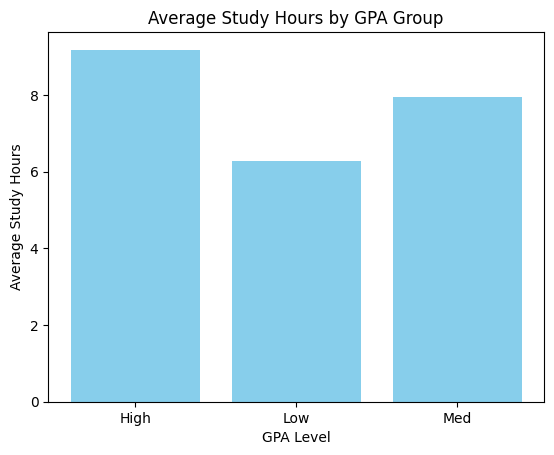

In [76]:
#Visualize - bar graph
plt.clf()
plt.bar(stress_by_gpa['GPA lvl'], stress_by_gpa['Study_Hours_Per_Day'], color='skyblue')
plt.xlabel("GPA Level")
plt.ylabel("Average Study Hours")
plt.title("Average Study Hours by GPA Group")
plt.show()

[]

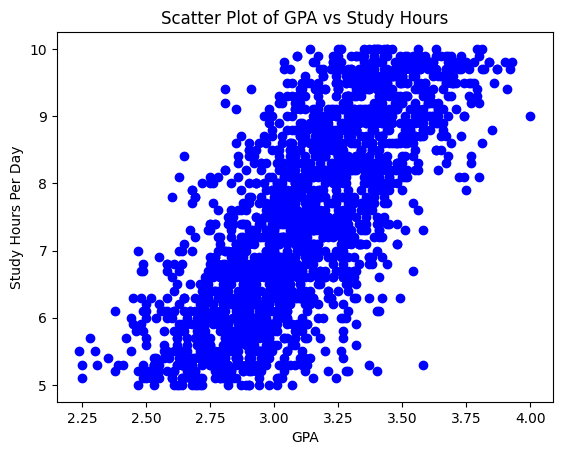

In [71]:
#Visualize - scatter plot

plt.clf()
plt.scatter(df['GPA'], df['Study_Hours_Per_Day'], color='blue', marker='o')
plt.xlabel('GPA')
plt.ylabel('Study Hours Per Day')
plt.title('Scatter Plot of GPA vs Study Hours')
plt.plot()